<a href="https://colab.research.google.com/github/zwzzhong/MLB_Players_Weight_Prediction/blob/master/MLB_Players_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [0]:
df.shape

(1034, 6)

In [0]:
df.isnull().values.any()

True

In [0]:
df = df.dropna()
df.isnull().values.any()

False

In [0]:
df.shape

(1033, 6)

### Clean

In [0]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [0]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


In [0]:
df_total = df[['Team','Age']].groupby('Team', as_index=False).count()
df_total.rename(index = str, columns = {'Age':'Total_Player'}, inplace=True)
df_total.head()

,Team,Total_Player
0,ANA,35
1,ARZ,28
2,ATL,37
3,BAL,35
4,BOS,36


In [0]:
df = pd.merge(df, df_total, on='Team')
df.head()

,Name,Team,Position,Height,Weight,Age,Total_Player
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,35
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,35
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,35
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,35
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,35


## EDA

In [0]:
df.describe()

,Height,Weight,Age,Total_Player
count,1033.000000,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648,34.545015
std,2.306330,20.991491,4.322298,1.905764
min,67.000000,150.000000,20.900000,28.000000
25%,72.000000,187.000000,25.440000,33.000000
50%,74.000000,200.000000,27.930000,35.000000
75%,75.000000,215.000000,31.240000,36.000000
max,83.000000,290.000000,48.520000,38.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 7 columns):
Name            1033 non-null object
Team            1033 non-null object
Position        1033 non-null object
Height          1033 non-null int64
Weight          1033 non-null float64
Age             1033 non-null float64
Total_Player    1033 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 64.6+ KB


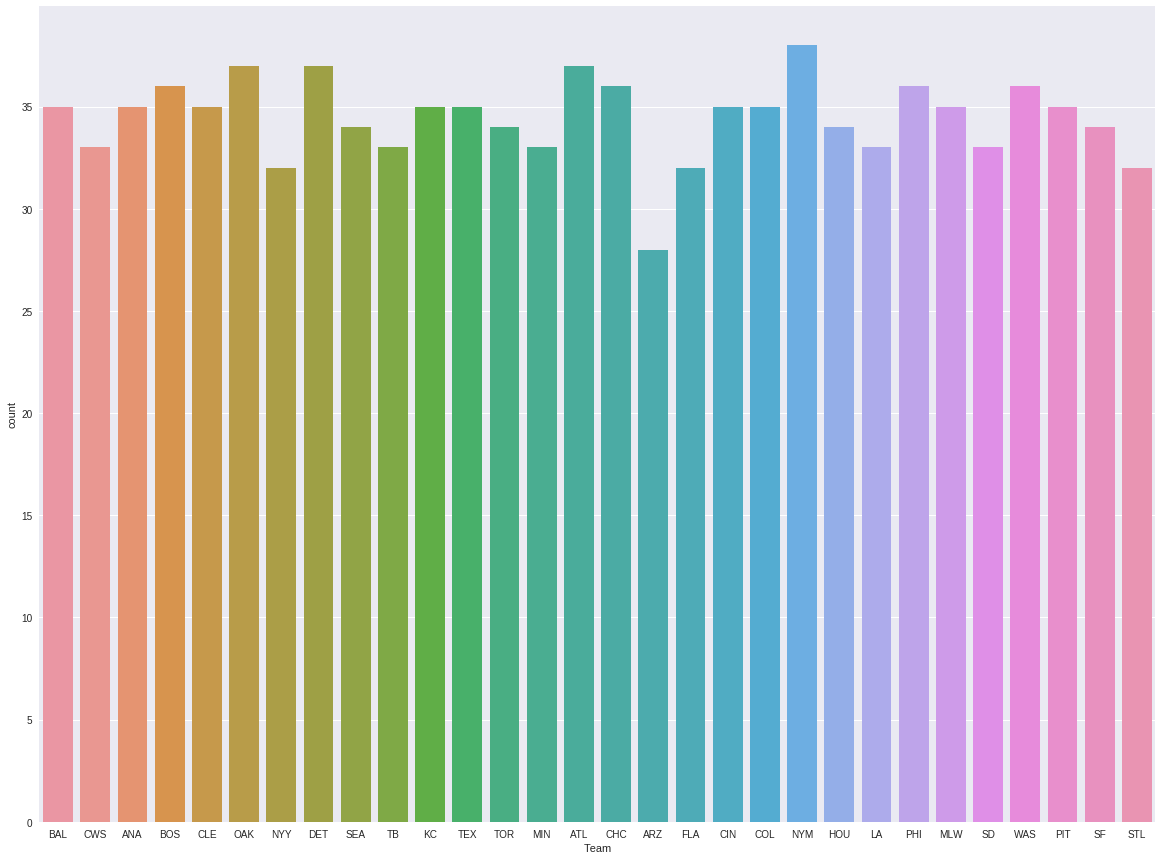

In [0]:
plt.figure(figsize=(20, 15))     
sns.countplot('Team', data = df)

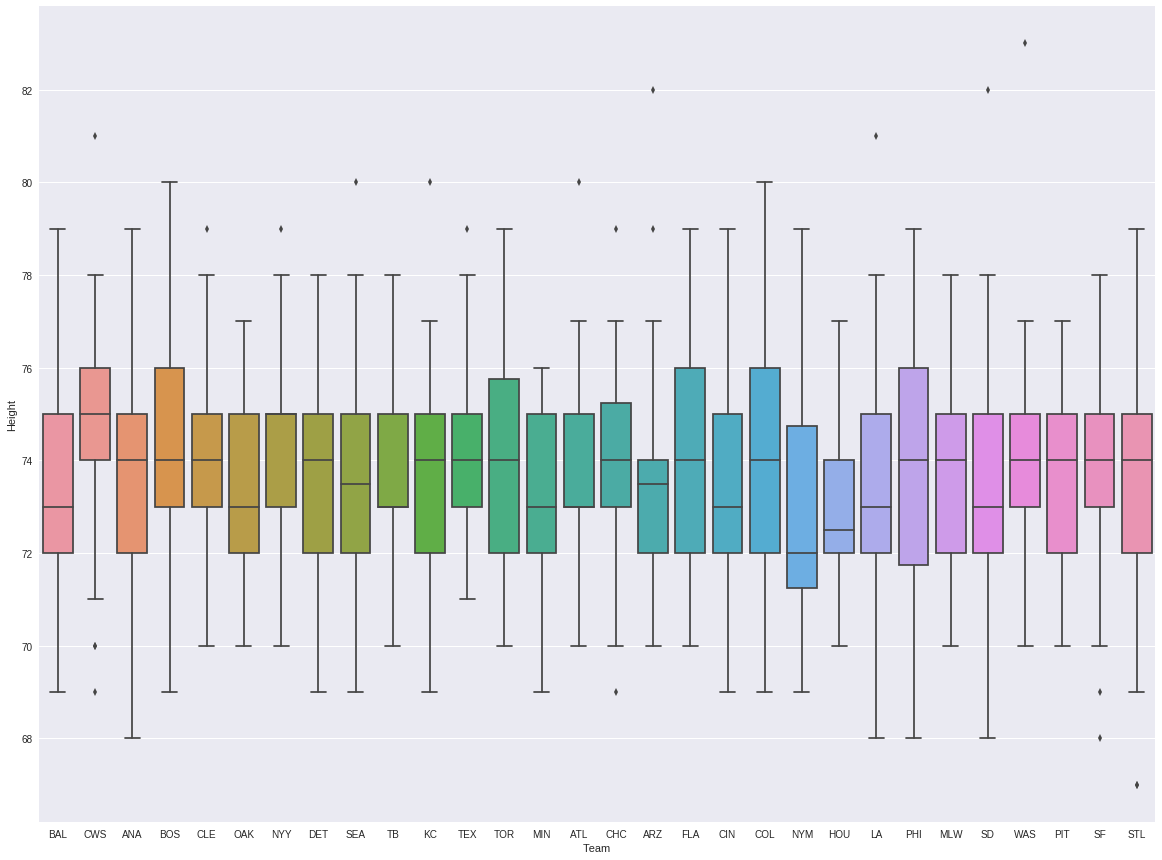

In [0]:
plt.figure(figsize=(20, 15))     
sns.boxplot('Team', 'Height', data = df)

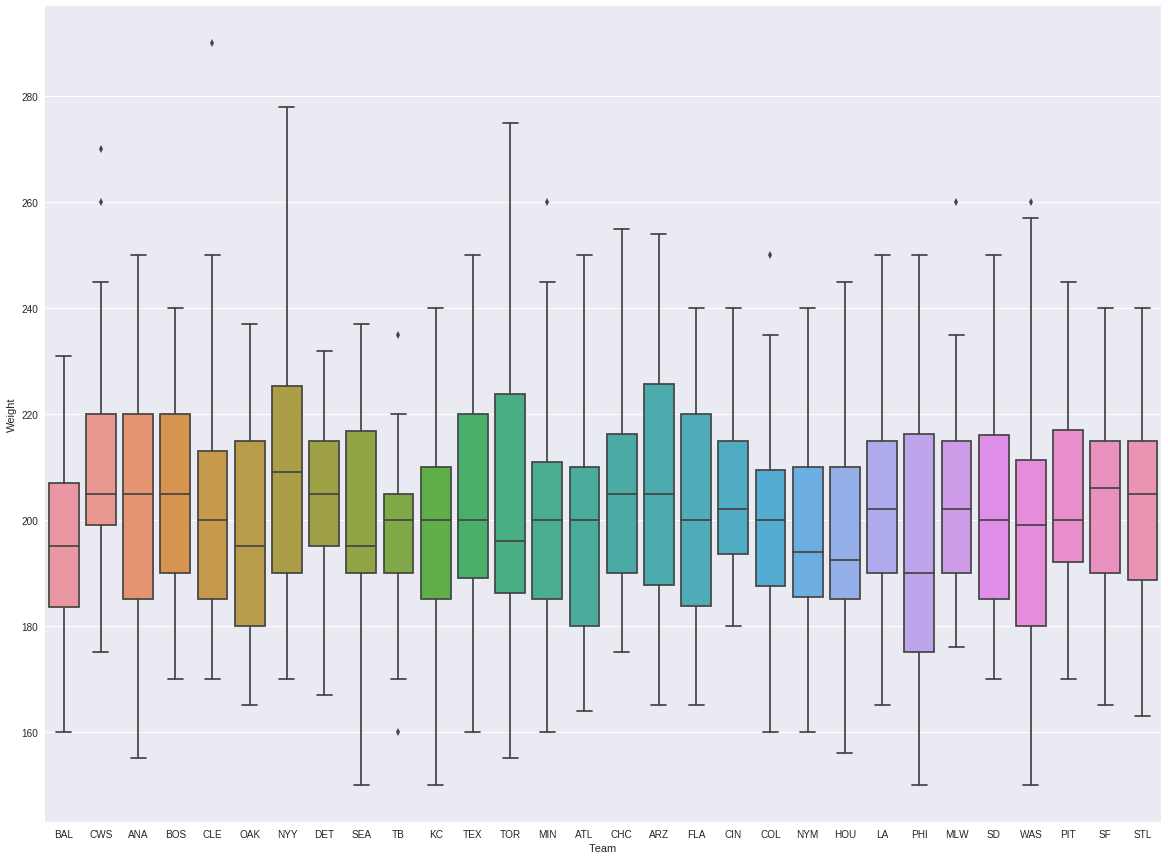

In [0]:
plt.figure(figsize=(20, 15))     
sns.boxplot('Team', 'Weight', data = df)

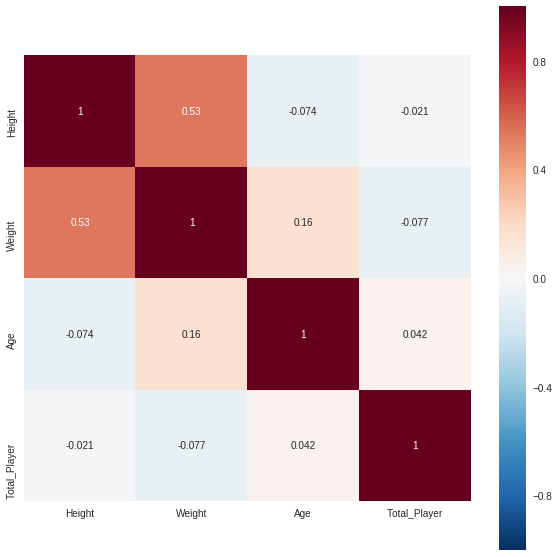

In [0]:
df_corr = df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(df_corr, annot=True, square=True)

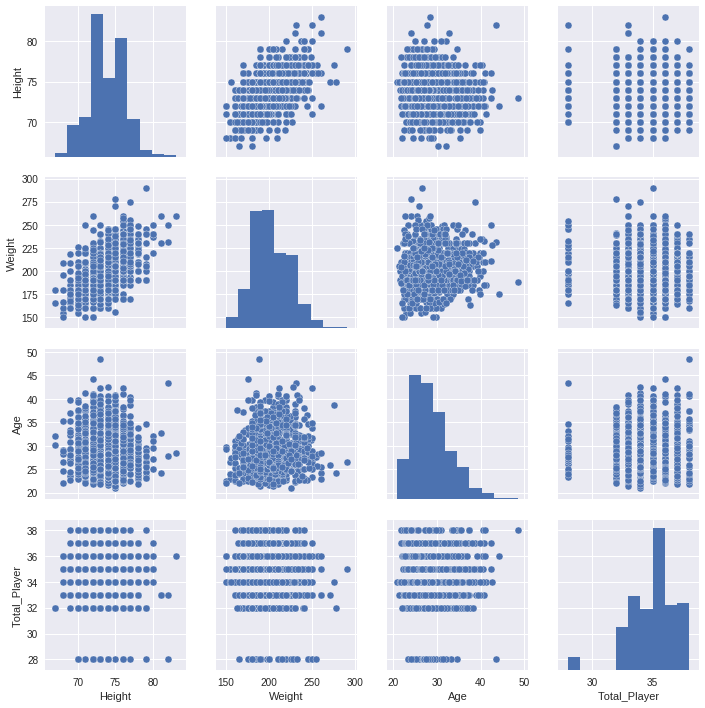

In [0]:
sns.pairplot(df)

## Model

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Create Features


In [0]:
df.groupby('Team').groups.keys()

dict_keys(['ANA', 'ARZ', 'ATL', 'BAL', 'BOS', 'CHC', 'CIN', 'CLE', 'COL', 'CWS', 'DET', 'FLA', 'HOU', 'KC', 'LA', 'MIN', 'MLW', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEX', 'TOR', 'WAS'])

In [0]:
def Agegrouping(row):
    if row['Age'] < 25:
        val = 1
    elif row['Age'] > 31:
        val = 3
    else:
        val = 2
    return val

df['Age_group'] = df.apply(Agegrouping, axis=1)
df.head()

,Name,Team,Position,Height,Weight,Age,Total_Player,Age_group
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,35,1
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,35,3
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,35,2
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,35,3
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,35,3


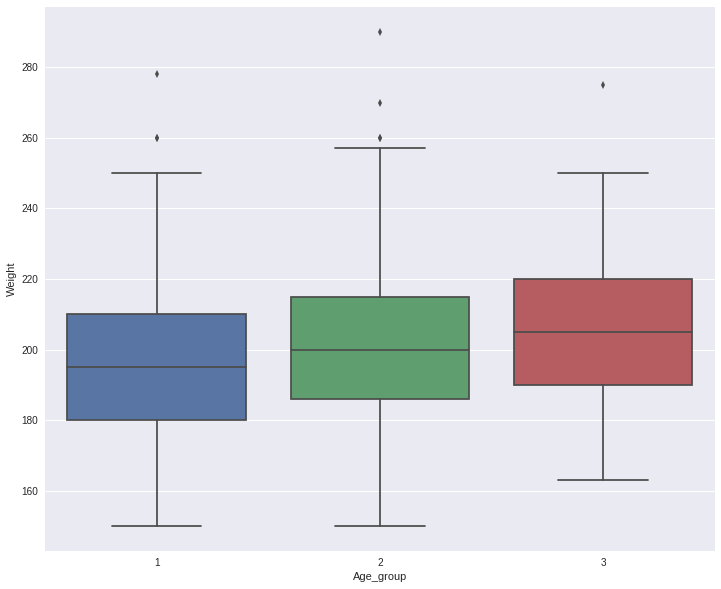

In [0]:
plt.figure(figsize=(12,10))
sns.boxplot('Age_group','Weight', data = df)

In [0]:
Age_group_dummy = pd.get_dummies(df['Age_group'])
Age_group_dummy.shape

(1033, 3)

In [0]:
y = df['Weight'].values #Target
y = y.reshape(-1, 1)
X = pd.concat([df['Height'],Age_group_dummy], axis = 1)
X.shape

(1033, 4)

### Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 4) (826, 1)
(207, 4) (207, 1)


### Fit the model

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Returns Numpy Array

In [0]:
type(predictions)

numpy.ndarray

### Plot Predictions

Text(0, 0.5, 'Predicted Weight')

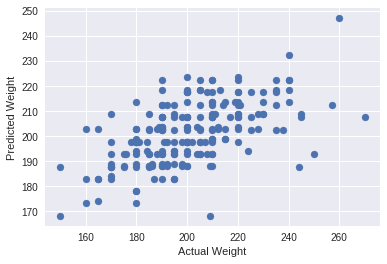

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

### Print Accuracy of Model

In [0]:
model.score(X_test, y_test)

0.32820491229827564

### Use Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores = cross_val_score(model, X, y, cv=6)
scores

array([0.35521319, 0.27373258, 0.33495054, 0.33829082, 0.17930178,
       0.3392208 ])

### Plot Cross-validation Predictions 

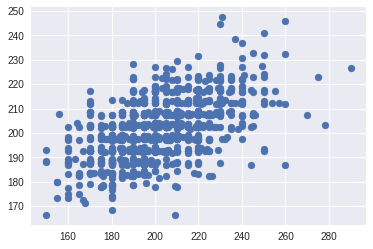

In [0]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.30858086904277326

## Conclusion

* Cross-Validation improved Accuracy
* Adding more data or more features could improve the model
* Major League Baseball may be a strange set to predict Weight
* Bigger Data Set here:  http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
